<a href="https://colab.research.google.com/github/prabindh/covid2020-predictor/blob/master/Prediction_Covid_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Exercise

Predict the number of cases n-days after from the 1st reported infection.

Use the data available in the below file, provided by JHU CSSE.

https://github.com/prabindh/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [1]:
#import cudf as pd
import pandas as pd

from urllib.request import urlopen
#numbers_csv = urlopen("https://raw.githubusercontent.com/prabindh/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_csv = urlopen("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_df = pd.read_csv(numbers_csv)
numbers_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735


Lets find the details of this dataset.


In [2]:
numbers_df["Country/Region"].describe()

count       266
unique      188
top       China
freq         33
Name: Country/Region, dtype: object

Treating the various provinces, countries as independent features, get only the numeric count for all rows.

In [3]:
count_df = numbers_df.iloc[:, 4:]
count_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735


In [4]:
count_df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.319549,45.255639,63.109023,74.763158,89.842105,103.921053,115.796992,129.304511,139.582707,150.973684,160.781955,168.458647,170.030075,226.996241,251.533835,259.586466,267.796992,275.447368,282.522556,284.402256,286.507519,288.872180,295.492481,296.921053,299.041353,302.248120,305.921053,311.048872,316.225564,323.349624,332.312030,...,4.165160e+04,4.237973e+04,4.306612e+04,4.369523e+04,4.448788e+04,4.528412e+04,4.614212e+04,4.701647e+04,4.782897e+04,4.855324e+04,4.927808e+04,5.011131e+04,5.098018e+04,5.193008e+04,5.283950e+04,5.373286e+04,5.453981e+04,5.531717e+04,5.619545e+04,5.724988e+04,5.831288e+04,5.936989e+04,6.033058e+04,6.113239e+04,6.198372e+04,6.293235e+04,6.401938e+04,6.507445e+04,6.616506e+04,6.710758e+04,6.796888e+04,6.873011e+04,6.970221e+04,7.072163e+04,7.179379e+04,7.284976e+04,7.382521e+04,7.466798e+04,7.552490e+04,7.625689e+04
std,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297287,443.366813,689.035590,832.953418,1026.582242,1209.754647,1359.927896,1534.122760,1665.831961,1820.905815,1949.402861,2049.809414,2050.149390,2958.034534,3337.708666,3450.661369,3569.103387,3679.809248,3783.531445,3804.941211,3830.105321,3843.654801,3930.735156,3930.773058,3943.282630,3973.896751,3998.654470,4024.278122,4044.749670,4072.597187,4109.799275,...,2.077731e+05,2.115862e+05,2.152704e+05,2.185227e+05,2.232225e+05,2.278641e+05,2.327321e+05,2.379025e+05,2.425434e+05,2.467301e+05,2.508099e+05,2.559110e+05,2.610084e+05,2.667935e+05,2.720146e+05,2.767198e+05,2.812228e+05,2.855753e+05,2.906567e+05,2.969408e+05,3.029832e+05,3.091674e+05,3.148280e+05,3.191988e+05,3.235822e+05,3.290138e+05,3.354734e+05,3.415342e+05,3.475856e+05,3.528794e+05,3.571261e+05,3.609420e+05,3.663507e+05,3.717968e+05,3.776103e+05,3.832573e+05,3.888225e+05,3.931864e+05,3.974736e+05,4.011416e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,

Get the country with maximum numbers the last day of record.


In [5]:
max_count = count_df.iloc[:, -1].max()
max_count

5141208

In [6]:
max_index = count_df['4/2/20'].idxmax()
max_index

225

In [7]:
numbers_df.iloc[max_index]

Province/State        NaN
Country/Region         US
Lat                    40
Long                 -100
1/22/20                 1
                   ...   
8/7/20            4941755
8/8/20            4997929
8/9/20            5044864
8/10/20           5094400
8/11/20           5141208
Name: 225, Length: 207, dtype: object

In [8]:
usa_data = numbers_df[numbers_df["Country/Region"] == "US"]
usa_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
225,NaN,US,40.0,-100.0,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,...,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3185737,3245925,3304942,3364157,3431574,3498902,3576157,3647715,3711413,3773260,3834677,3899211,3970121,4038816,4112531,4178970,4233923,4290337,4356206,4426982,4495015,4562107,4620592,4668172,4713540,4771080,4823890,4883582,4941755,4997929,5044864,5094400,5141208


In [9]:
china_data = numbers_df[numbers_df["Country/Region"] == "China"]
china_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,926,928,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,929,931,932,933,933,933,933,933,933,934,934,935,935,935,935,935,935
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,582,582,582,582,582,582,582,582,582,582,582,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,363,363,363,363,363,363,363,363,363,363,363,363,363,363,364,364,364,364,364,364,364,364,365,366,366,366,366,366,366,367,367,367,367,367,367,367,367,367,367,368
53,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,164,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,169,169
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,1643,1643,1643,1643,1645,1647,1647,1647,1648,1650,1650,1650,1650,1654,1657,1659,1659,1659,1661,1662,1667,1669,1672,1672,1672,1674,1675,1678,1680,1682,1683,1687,1687,1687,1687,1688,1693,1696,1699,1699
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,254,254,254,254,254,254,254,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,350,350


How does India fare ?

In [10]:
india_data = numbers_df[numbers_df["Country/Region"] == "India"]
india_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
131,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,648315,673165,697413,719664,742417,767296,793802,820916,849522,878254,906752,936181,968857,1003832,1039084,1077781,1118206,1155338,1193078,1238798,1288108,1337024,1385635,1435616,1480073,1531669,1581963,1634746,1695988,1750723,1803695,1855745,1908254,1964536,2027074,2088611,2153010,2215074,2268675,2329638


## Visualisation of the rates

In [11]:
# Take only the numerical values
counts = india_data.iloc[0:1, range(4, len(india_data.columns))]

startCol = 0
for columnName in counts:
  if counts[columnName].values > 0:
    break
  startCol = startCol + 1
counts = counts.iloc[0:1, range(startCol, len(counts.columns))]

counts

,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20
131,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,5,28,30,31,34,39,43,...,648315,673165,697413,719664,742417,767296,793802,820916,849522,878254,906752,936181,968857,1003832,1039084,1077781,1118206,1155338,1193078,1238798,1288108,1337024,1385635,1435616,1480073,1531669,1581963,1634746,1695988,1750723,1803695,1855745,1908254,1964536,2027074,2088611,2153010,2215074,2268675,2329638


## Converting to np array

In [12]:
counts_np = counts.to_numpy()

In [13]:
counts_np.shape

(1, 195)

In [14]:
import numpy as np
counts_np = np.squeeze(counts_np)

In [15]:
import numpy as np
counts_np

array([      1,       1,       1,       2,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       5,       5,      28,
            30,      31,      34,      39,      43,      56,      62,
            73,      82,     102,     113,     119,     142,     156,
           194,     244,     330,     396,     499,     536,     657,
           727,     887,     987,    1024,    1251,    1397,    1998,
          2543,    2567,    3082,    3588,    4778,    5311,    5916,
          6725,    7598,    8446,    9205,   10453,   11487,   12322,
         13430,   14352,   15722,   17615,   18539,   20080,   21370,
         23077,   24530,   26283,   27890,   29451,   31324,   33062,
         34863,   37257,   39699,   42505,   46437,   49400,   52987,
         56351,   59

## Visualisation of the data

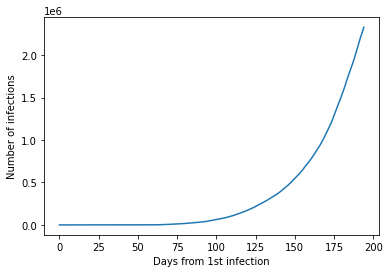

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,counts_np.shape[0])),counts_np)
plt.xlabel("Days from 1st infection") 
plt.ylabel("Number of infections") 
plt.show()


## Formulate the data-set


In [17]:
x_days = np.array(list(range(0, len(counts_np))))
x_days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
y_infections_india = counts_np
y_infections_india

array([      1,       1,       1,       2,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       5,       5,      28,
            30,      31,      34,      39,      43,      56,      62,
            73,      82,     102,     113,     119,     142,     156,
           194,     244,     330,     396,     499,     536,     657,
           727,     887,     987,    1024,    1251,    1397,    1998,
          2543,    2567,    3082,    3588,    4778,    5311,    5916,
          6725,    7598,    8446,    9205,   10453,   11487,   12322,
         13430,   14352,   15722,   17615,   18539,   20080,   21370,
         23077,   24530,   26283,   27890,   29451,   31324,   33062,
         34863,   37257,   39699,   42505,   46437,   49400,   52987,
         56351,   59

## Obtaining data for any country

Note the changes, to add up all provinces/regions within a country, if found. For example, there are more than one regions in China.

In [19]:
def get_covidian_count(country_name):
  country_data = numbers_df[numbers_df["Country/Region"] == country_name]
  rows = country_data.shape[0]
  counts = country_data.iloc[0:rows, range(4, len(country_data.columns))]
  counts = counts.sum()
  startCol = 0
  for column in counts:
    if column > 0:
      break
    startCol = startCol + 1
  counts = counts.iloc[range(startCol, len(counts))]
  np_arr = np.squeeze(counts.to_numpy())
  x_days = np.array(list(range(0, len(np_arr))))
  return np.array([x_days, np_arr])



In [20]:
infections_usa = get_covidian_count("US")
infections_india = get_covidian_count("India")
infections_china = get_covidian_count("China")
infections_india

array([[      0,       1,       2,       3,       4,       5,       6,
              7,       8,       9,      10,      11,      12,      13,
             14,      15,      16,      17,      18,      19,      20,
             21,      22,      23,      24,      25,      26,      27,
             28,      29,      30,      31,      32,      33,      34,
             35,      36,      37,      38,      39,      40,      41,
             42,      43,      44,      45,      46,      47,      48,
             49,      50,      51,      52,      53,      54,      55,
             56,      57,      58,      59,      60,      61,      62,
             63,      64,      65,      66,      67,      68,      69,
             70,      71,      72,      73,      74,      75,      76,
             77,      78,      79,      80,      81,      82,      83,
             84,      85,      86,      87,      88,      89,      90,
             91,      92,      93,      94,      95,      96,      97,
      

In [21]:
np.savetxt("usa.csv",  np.transpose([infections_usa[0],infections_usa[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("india.csv",  np.transpose([infections_india[0],infections_india[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("china.csv",  np.transpose([infections_china[0],infections_china[1]]), fmt="%d,%d", header="Days, Count")

To confirm the data is proper, load the data back and check.

In [22]:
test_np = np.loadtxt("usa.csv", delimiter=',', skiprows=1, dtype='int,int')
test_np

array([(  0,       1), (  1,       1), (  2,       2), (  3,       2),
       (  4,       5), (  5,       5), (  6,       5), (  7,       5),
       (  8,       5), (  9,       7), ( 10,       8), ( 11,       8),
       ( 12,      11), ( 13,      11), ( 14,      11), ( 15,      11),
       ( 16,      11), ( 17,      11), ( 18,      11), ( 19,      11),
       ( 20,      12), ( 21,      12), ( 22,      13), ( 23,      13),
       ( 24,      13), ( 25,      13), ( 26,      13), ( 27,      13),
       ( 28,      13), ( 29,      13), ( 30,      15), ( 31,      15),
       ( 32,      15), ( 33,      15), ( 34,      15), ( 35,      15),
       ( 36,      16), ( 37,      16), ( 38,      24), ( 39,      30),
       ( 40,      53), ( 41,      73), ( 42,     104), ( 43,     174),
       ( 44,     222), ( 45,     337), ( 46,     451), ( 47,     519),
       ( 48,     711), ( 49,    1109), ( 50,    1561), ( 51,    2157),
       ( 52,    2870), ( 53,    2968), ( 54,    4360), ( 55,    6141),
      

## Given x, predict y

#### Kaggle
Note - this notebook is also available as a Kaggle kernel, at
https://www.kaggle.com/prabindh/kernel5f31471257

#### References
1. https://pypi.org/project/fbprophet

2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
